In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

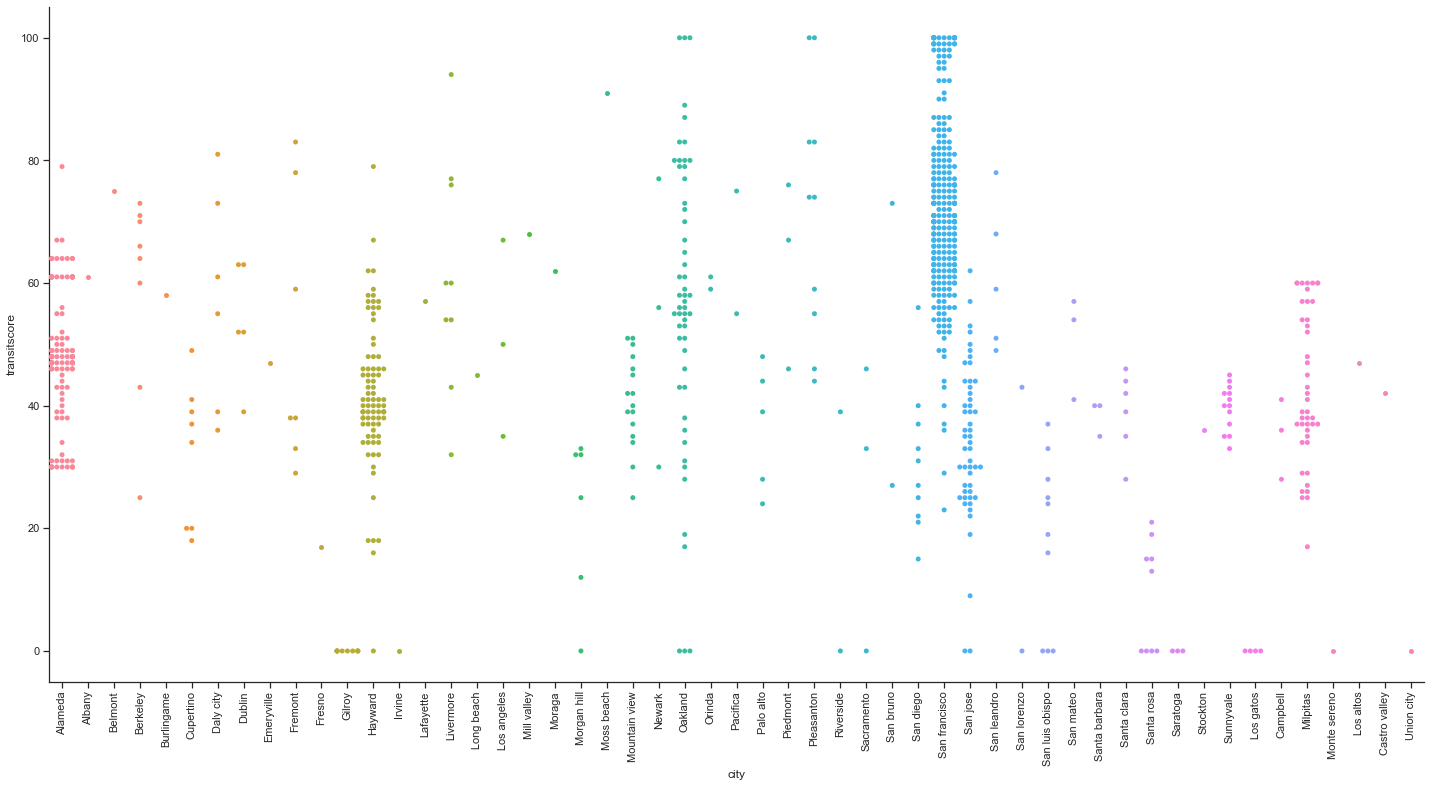

In [4]:
data_df = pd.read_csv('scrape_data_v2.csv',index_col=0)
df = data_df.dropna(subset=['street', 'city', 'price', 'transitscore'])

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="city", y="transitscore", data=df, height=10, aspect=20/10, kind='swarm')
g.set_xticklabels(rotation=90)

https://www.redfin.com/how-walk-score-works

# Transit Score®	Description:

90–100	Rider's Paradise (World-class public transportation)

70–89	Excellent Transit (Transit is convenient for most trips)

50–69	Good Transit (Many nearby public transportation options)

25–49	Some Transit (A few nearby public transportation options)

0–24	Minimal Transit (It is possible to get on a bus)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'San francisco'),
  Text(1, 0, 'Alameda'),
  Text(2, 0, 'Hayward'),
  Text(3, 0, 'Oakland'),
  Text(4, 0, 'San jose'),
  Text(5, 0, 'Milpitas'),
  Text(6, 0, 'Mountain view'),
  Text(7, 0, 'Sunnyvale')])

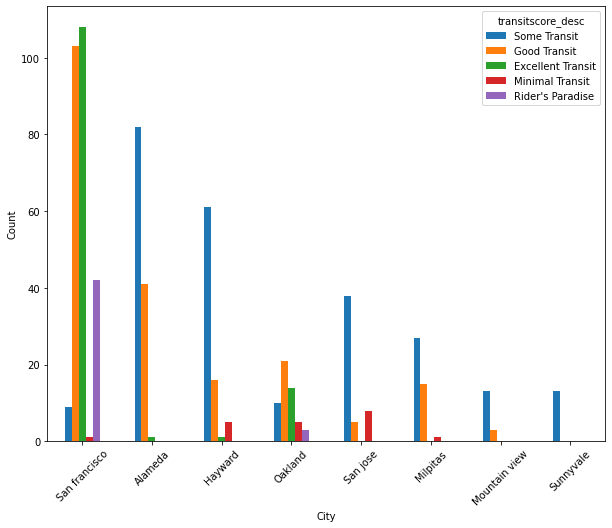

In [208]:
transit_score_desc_list = []
for t in df['transitscore']:
    if t <= 100 and t >= 90:
        transit_score_desc_list.append('Rider\'s Paradise')
    elif t <= 89 and t >= 70:
        transit_score_desc_list.append('Excellent Transit')
    elif t <= 69 and t >= 50:
        transit_score_desc_list.append('Good Transit')
    elif t <= 49 and t >= 25:
        transit_score_desc_list.append('Some Transit')
    elif t <= 24 and t >= 0:
        transit_score_desc_list.append('Minimal Transit')
    else:
        transit_score_desc_list.append('')
df['transitscore_desc'] = transit_score_desc_list
g = pd.crosstab(df['city'], df['transitscore_desc'])
cities_8 = ['San francisco', 'Alameda', 'Hayward', 'Oakland', 'San jose', 'Milpitas', 'Mountain view', 'Sunnyvale']
unique_ts = list(df['transitscore_desc'].unique())
g.loc[cities_8, unique_ts].plot.bar(figsize=(10,8))
plot.xlabel('City')
plot.ylabel('Count')
plot.xticks(rotation=45)

Text(0.5, 1.0, 'Correlation between Price and Transit Scores')

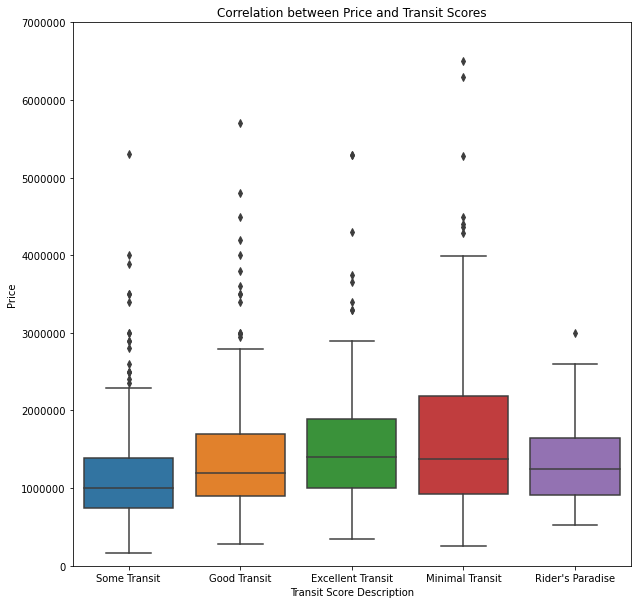

In [209]:
# Price range based on the transit score (averaged for each city)
plot.figure(figsize=(10,10))
sns.boxplot(x="transitscore_desc", y="price", data=df)
plot.ticklabel_format(style='plain', axis='y')
plot.ylim(0, 7000000)
plot.ylabel("Price")
plot.xlabel("Transit Score Description")
plot.title("Correlation between Price and Transit Scores")